## K-means를 이용한 붓꽃 데이터 군집화

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris = load_iris()
iris.feature_names 
iris.target 

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
cols = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(
    data=iris.data
    , columns=cols
)
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [7]:
kmeans = KMeans(
      n_clusters=3
    , init='k-means++' # 초기 중심점 위치 지정
    , max_iter=300
    , random_state=0
)
kmeans.fit(iris_df)

print(kmeans.labels_[50:99])

[2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2]


In [8]:
print(iris.target[50:99])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]


In [9]:
print(kmeans.labels_[100:149])
print(iris.target[100:149])

[0 2 0 0 0 0 2 0 0 0 0 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0
 0 2 0 0 0 2 0 0 0 2 0 0]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2]


In [10]:
iris_df['target'] = iris.target
iris_df['cluster'] = kmeans.labels_
iris_df.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0
149,5.9,3.0,5.1,1.8,2,2


In [11]:
iris_result = iris_df.groupby(['target','cluster'])['sepal_length'].count()

In [12]:
print(iris_result)

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


In [13]:
iris_df.shape

(150, 6)

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transfored = pca.fit_transform(iris.data)

iris_df['pca_x'] = pca_transfored[:,0]
iris_df['pca_y'] = pca_transfored[:,1]
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


In [15]:
cluster0_ind = iris_df[iris_df['cluster']==0].index
cluster1_ind = iris_df[iris_df['cluster']==1].index 
cluster2_ind = iris_df[iris_df['cluster']==2].index 

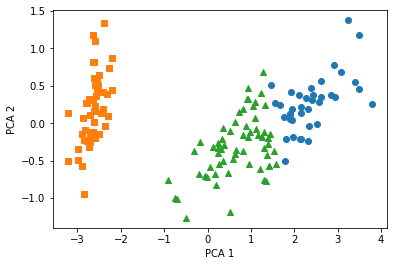

In [20]:
plt.scatter(
      x=iris_df.loc[cluster0_ind,'pca_x']
    , y=iris_df.loc[cluster0_ind,'pca_y']
    , marker='o'
)
plt.scatter(
      x=iris_df.loc[cluster1_ind,'pca_x']
    , y=iris_df.loc[cluster1_ind,'pca_y']
    , marker='s'
)

plt.scatter(
      x=iris_df.loc[cluster2_ind,'pca_x']
    , y=iris_df.loc[cluster2_ind,'pca_y']
    , marker='^'
)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

### Clustering 알고리즘 테스트를 위한 데이터 생성
- blobs datasets : Random 데이터 생성

In [21]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [24]:
X, y = make_blobs(
      n_samples=200 
    , n_features=2 
    , centers=3 
    , cluster_std=0.8 
    , random_state=0
)
print(X.shape, ' 원래 답 : ',y.shape)

(200, 2)  원래 답 :  (200,)


In [25]:
type(y)

numpy.ndarray

In [26]:
labels, counts = np.unique(y, return_counts=True) 
print('레이블 : ', labels, ' 개수 : ', counts)

레이블 :  [0 1 2]  개수 :  [67 67 66]
